## Practice Exercise 2

In this assignment, you will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. You will have to download a movie dataset, write Python code to explore the data, gain insights into the movies, actors, directors, and collections, and submit the code.

#### Some tips before starting the assignment

1. Identify the task to be performed correctly, and only then proceed to write the required code. Don’t perform any incorrect analysis or look for information that isn’t required for the assignment.
2. In some cases, the variable names have already been assigned, and you just need to write code against them. In other cases, the names to be given are mentioned in the instructions. We strongly advise you to use the mentioned names only.
3. Always keep inspecting your data frame after you have performed a particular set of operations.
4. There are some checkpoints given in the IPython notebook provided. They're just useful pieces of information you can use to check if the result you have obtained after performing a particular task is correct or not.
5. Note that you will be asked to refer to documentation for solving some of the questions. That is done on purpose for you to learn new commands and also how to use the documentation.

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

### Task 1: Reading and Inspection

**Subtask 1.1: Import and read**

Import and read the movie database. Store it in a variable called `movies`.

In [66]:
# Write your code for importing the csv file here
movies = pd.read_csv('Movies.csv')
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


**Subtask 1.2: Inspect the dataframe**

Inspect the dataframe's columns, shapes, variable types etc.

In [20]:
movies.shape
movies.isnull().sum() # prints list with col name
print((movies.isnull().sum()>0).sum()) #just prints the column count where null is > 0, nice

12


#### <font color='red'>Question 1: How many rows and columns are present in the dataframe? </font>
-  <font color='red'>(3821, 26)</font>
-  <font color='red'>(3879, 28)</font>
-  <font color='red'>(3853, 28)</font>
-  <font color='red'>(3866, 26)</font>

#### <font color='red'>Question 2: How many columns have null values present in them? Try writing a code for this instead of counting them manually.</font>

-  <font color='red'>3</font>
-  <font color='red'>6</font>
-  <font color='red'>9</font>
-  <font color='red'>12</font>

### Task 2: Cleaning the Data

**Subtask 2.1: Drop unecessary columns**

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [41]:
# Check the 'drop' function in the Pandas library - dataframe.drop(list_of_unnecessary_columns, axis = )
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations
dropped = movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)
#+4 more in count as i havent mentioned the col names
dropped.shape # (3853, 17) - 4 = 13ans


(3853, 13)

#### <font color='red'>Question 3: What is the count of columns in the new dataframe? </font>
-  <font color='red'>10</font>
-  <font color='red'>13</font>
-  <font color='red'>15</font>
-  <font color='red'>17</font>

**Subtask 2.2: Inspect Null values**

As you have seen above, there are null values in multiple columns of the dataframe 'movies'. Find out the percentage of null values in each column of the dataframe 'movies'. 

In [45]:
# Write you code here
movies.isnull().sum().max()
# movies.isNotnull().sum()
percent_missing = dropped.isnull().sum() * 100 / len(dropped)
print(percent_missing.max())
# movies
missing_value_df = pd.DataFrame({'column_name': dropped.columns,'percent_missing': percent_missing})
missing_value_df

ans = round(100*(movies.isnull().sum()/len(movies.index)), 2)
print(ans)


0.07786140669608098
color                        0.05
director_name                0.00
num_critic_for_reviews       0.03
duration                     0.03
director_facebook_likes      0.00
actor_3_facebook_likes       0.16
actor_2_name                 0.03
actor_1_facebook_likes       0.00
gross                        0.00
genres                       0.00
actor_1_name                 0.00
movie_title                  0.00
num_voted_users              0.00
cast_total_facebook_likes    0.00
actor_3_name                 0.16
facenumber_in_poster         0.16
plot_keywords                0.78
movie_imdb_link              0.00
num_user_for_reviews         0.00
language                     0.08
country                      0.00
content_rating               1.25
budget                       0.00
title_year                   0.00
actor_2_facebook_likes       0.03
imdb_score                   0.00
aspect_ratio                 1.87
movie_facebook_likes         0.00
dtype: float64


#### <font color='red'>Question 4: Which column has the highest percentage of null values? </font>
-  <font color='red'>language</font>
-  <font color='red'>genres</font>
-  <font color='red'>num_critic_for_reviews</font>
-  <font color='red'>imdb_score</font>

**Subtask 2.3: Fill NaN values**

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [47]:
# Write your code for filling the NaN values in the 'language' column here
round(100*(dropped.isnull().sum()/len(dropped.index)), 2)

director_name             0.00
num_critic_for_reviews    0.03
gross                     0.00
genres                    0.00
actor_1_name              0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
language                  0.08
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

#### <font color='red'>Question 5: What is the count of movies made in English language after replacing the NaN values with English? </font>
-  <font color='red'>3670</font>
-  <font color='red'>3674</font>
-  <font color='red'>3668</font>
-  <font color='red'>3672</font>

### Task 3: Data Analysis

**Subtask 3.1: Change the unit of columns**

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [53]:
dropped['language'] = dropped['language'].fillna('English')
dropped[dropped['language'] == 'English'].shape
#also
movies.loc[pd.isnull(movies['language']), ['language']] = 'English'
(dropped.language=='English').sum()

3674

**Subtask 3.2: Find the movies with highest profit**

   1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
   2. Sort the dataframe using the `profit` column as reference. (Find which command can be used here to sort entries from the documentation)
   3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [69]:
movies['profit'] = movies['gross'] - movies['budget']
sorted = movies.sort_values(['profit'])
# display(movies.to_string())
sorted[['movie_title','profit']].tail()

,movie_title,profit
2748,E.T. the Extra-Terrestrial,424449459.0
2704,Star Wars: Episode IV - A New Hope,449935665.0
25,Titanic,458672302.0
28,Jurassic World,502177271.0
0,Avatar,523505847.0


In [87]:
# Write your code for sorting the dataframe here
IMDb_Top_250 = movies.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)
IMDb_Top_250

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,rating_group,Rank
1795,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,R,25000000.0,1994.0,745.0,9.3,1.85,108000,3341469.0,4,1
3016,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,R,6000000.0,1972.0,10000.0,9.2,1.85,43000,128821952.0,4,2
2543,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,...,R,13000000.0,1974.0,14000.0,9.0,1.85,14000,44300000.0,4,3
64,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,348316061.0,4,4
325,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,...,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000,283019252.0,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2708,Color,David O. Russell,410.0,116.0,737.0,141.0,Jack McGee,23000.0,93571803.0,Biography|Drama|Sport,...,R,25000000.0,2010.0,238.0,7.9,2.35,36000,68571803.0,4,246
22,Color,Peter Jackson,509.0,186.0,0.0,773.0,Adam Brown,5000.0,258355354.0,Adventure|Fantasy,...,PG-13,225000000.0,2013.0,972.0,7.9,2.35,83000,33355354.0,4,247
1612,Color,James Mangold,291.0,153.0,446.0,154.0,Dallas Roberts,523.0,119518352.0,Biography|Drama|Music|Romance,...,PG-13,28000000.0,2005.0,405.0,7.9,2.39,11000,91518352.0,4,248
3237,Color,Duncan Jones,415.0,97.0,0.0,372.0,Matt Berry,18000.0,5009677.0,Drama|Mystery|Sci-Fi,...,R,5000000.0,2009.0,572.0,7.9,2.35,47000,9677.0,4,249


In [ ]:
top10 = # Write your code to get the top 10 profiting movies here

**Checkpoint:** You might spot two movies directed by `James Cameron` in the list.

#### <font color='red'>Question 6: Which movie is ranked 5th from the top in the list obtained? </font>
-  <font color='red'>E.T. the Extra-Terrestrial</font>
-  <font color='red'>The Avengers</font>
-  <font color='red'>The Dark Knight</font>
-  <font color='red'>Titanic</font>

**Subtask 3.3: Find IMDb Top 250**

Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000. 

Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.

In [85]:
# import pandas as pd
# Assuming your dataframe is named 'movies' and the column with movie ratings is 'rating'
# Define the rating groups
rating_groups = [(7.5, 8), (8, 8.5), (8.5, 9), (9, 9.5), (9.5, 10)]
# Create the bin edges for pd.cut()
# bins = [group[0] for group in rating_groups] + [float('inf')]
bins = 5
# Create a new column 'rating_group' to store the group for each movie
movies['rating_group'] = pd.cut(movies['imdb_score'], bins=bins, labels=False, right=False)
# Group the movies dataframe by 'rating_group' and count the number of movies in each group
grouped_movies = movies.groupby('rating_group').size().reset_index(name='count')
# Print the grouped movies dataframe
print(grouped_movies)



   rating_group  count
0             0     31
1             1    183
2             2   1243
3             3   2044
4             4    352


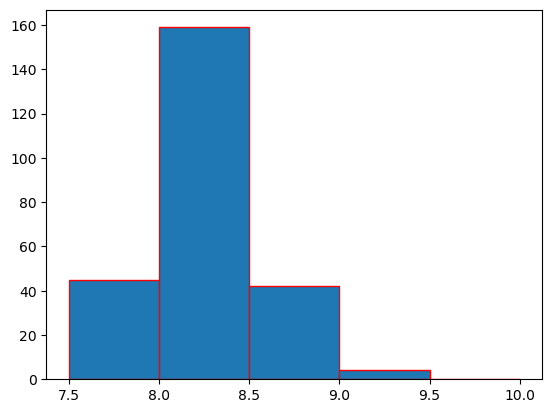

In [89]:
IMDb_Top_250 = movies.sort_values(by = 'imdb_score', ascending = False)
IMDb_Top_250 = IMDb_Top_250.loc[IMDb_Top_250.num_voted_users > 25000]
IMDb_Top_250 = IMDb_Top_250.iloc[:250, ]
IMDb_Top_250['Rank'] = range(1,251)

import matplotlib.pyplot as plt
plt.hist(IMDb_Top_250['imdb_score'], bins = 5, range = (7.5,10), edgecolor = 'red')
plt.show()

#### <font color='red'>Question 7: Suppose movies are divided into 5 buckets based on the IMDb ratings: </font>
-  <font color='red'>7.5 to 8</font>
-  <font color='red'>8 to 8.5</font>
-  <font color='red'>8.5 to 9</font>
-  <font color='red'>9 to 9.5</font>
-  <font color='red'>9.5 to 10</font>

<font color = 'red'> Which bucket holds the maximum number of movies from *IMDb_Top_250*? </font>

**Subtask 3.4: Find the critic-favorite and audience-favorite actors**

   1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
   2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
   3. Group the combined dataframe using the `actor_1_name` column.
   4. Find the mean of the `num_critic_for_reviews` and `num_user_for_review` and identify the actors which have the highest mean.

In [ ]:
# Write your code for creating three new dataframes here
Meryl_Streep = # Include all movies in which Meryl_Streep is the lead

In [ ]:
Leo_Caprio = # Include all movies in which Leo_Caprio is the lead

In [ ]:
Brad_Pitt = # Include all movies in which Brad_Pitt is the lead

In [88]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
Combined_by_segment = Combined.groupby('actor_1_name')

Combined_by_segment['num_user_for_reviews'].mean()

actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64

In [ ]:
# Write your code for grouping the combined dataframe here


In [ ]:
# Write the code for finding the mean of critic reviews and audience reviews here


#### <font color='red'>Question 8: Which actor is highest rated among the three actors according to the user reviews? </font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

#### <font color='red'>Question 9: Which actor is highest rated among the three actors according to the critics?</font>
-  <font color='red'>Meryl Streep</font>
-  <font color='red'>Leonardo DiCaprio</font>
-  <font color='red'>Brad Pitt</font>

In [94]:
Meryl_Streep = movies.loc[movies.actor_1_name == 'Meryl Streep']
Leo_Caprio = movies.loc[movies.actor_1_name == 'Leonardo DiCaprio']
Brad_Pitt = movies.loc[movies.actor_1_name == 'Brad Pitt']
Combined = pd.concat([Meryl_Streep, Brad_Pitt, Leo_Caprio])
print(Meryl_Streep)
# print(Combined)
Combined_by_segment = Combined.groupby('actor_1_name')
print(Combined_by_segment)

Combined_by_segment['num_critic_for_reviews'].mean()

      color   director_name  num_critic_for_reviews  duration  \
392   Color    Nancy Meyers                   187.0     120.0   
1038  Color   Curtis Hanson                    42.0     111.0   
1132  Color     Nora Ephron                   252.0     123.0   
1322  Color   David Frankel                   208.0     109.0   
1390  Color  Robert Redford                   227.0      92.0   
1471  Color  Sydney Pollack                    66.0     161.0   
1514  Color   David Frankel                   234.0     100.0   
1563  Color   Carl Franklin                    64.0     127.0   
1784  Color  Stephen Daldry                   174.0     114.0   
2500  Color  Phyllida Lloyd                   331.0     105.0   
2793  Color   Robert Altman                   211.0     105.0   

      director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
392                     278.0                   963.0     Hunter Parrish   
1038                    161.0                   132.0    Glenn Mors

actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64